In [1]:
import shap # pip install --force-reinstall -v "shap==0.43.0"
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [2]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Species')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [3]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [4]:
# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
model.classes_

array([0, 1, 2])

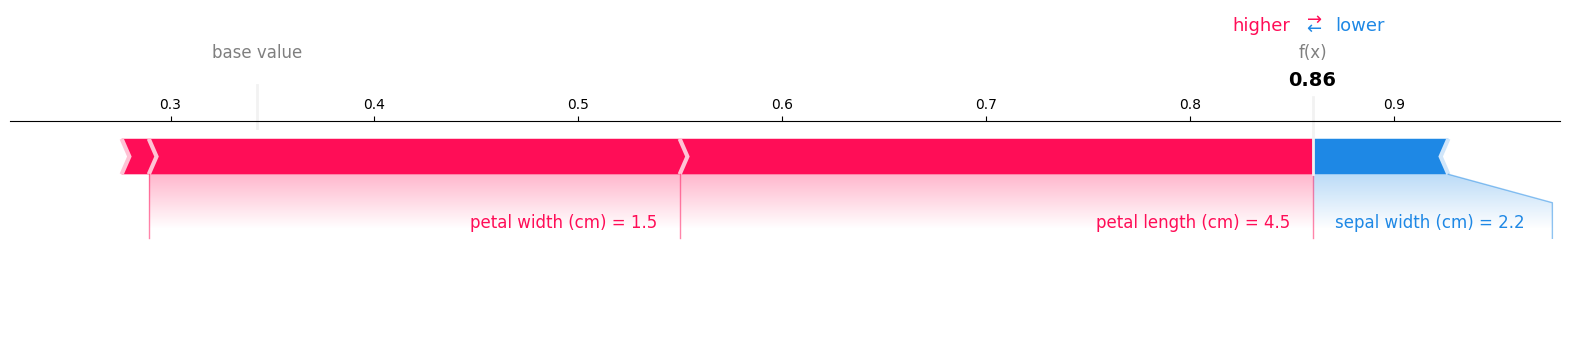

In [8]:
instance_index = 8  # Change this to the index of the instance you want to visualize

# Predict the class for the specified instance
predicted_class = model.predict(X_test.iloc[instance_index:instance_index +
                                            1])[0]

# Assuming shap_values has been correctly computed for the test set
# Generate the SHAP force plot for the predicted class of the specified instance
shap.force_plot(explainer.expected_value[predicted_class],
                shap_values[predicted_class][instance_index],
                X_test.iloc[instance_index].values,
                feature_names=iris.feature_names,
                matplotlib=True)

In [9]:
predicted_class

1

## How to interpret it:

__Base Value__: This is the average model output over the dataset that was used by the SHAP explainer during initialization (or the probability of the given class in the training data, as the above example). You can think of it as the starting point before considering the effect of each individual feature in the instance being explained.

__Output Value (f(x))__: This is the actual prediction for the instance being explained by the plot. It's the final output of the model after considering the contribution of each feature.

__Feature Values__: In the plot, you can see three features with numerical values next to them indicating the actual measured value for these features in the instance being explained .

__Red and Blue Arrows (SHAP Values)__: The length of these arrows indicates the magnitude of the impact of each feature on the model's prediction.

__Blue Arrows__: They represent features that are pushing the prediction to be lower than the base value. In this case, "sepal width (cm)" with a value of21.2 is pushing the prediction lower.
__Red Arrows__: These are features that push the prediction higher. Here, "petal width (cm)" with a value of 1.5 and Petal length (cm) with a value of 4.5 are pushing the prediction higher.

__Higher ⇨ Lower__: This shows the direction of the prediction. If the features are pushing the prediction to the right (red), it means they are contributing to a higher prediction value. Conversely, if they push to the left (blue), they contribute to a lower prediction value.

__Color Intensity__: The color intensity corresponds to the feature value's impact. A deeper color means a stronger impact on the model's output.

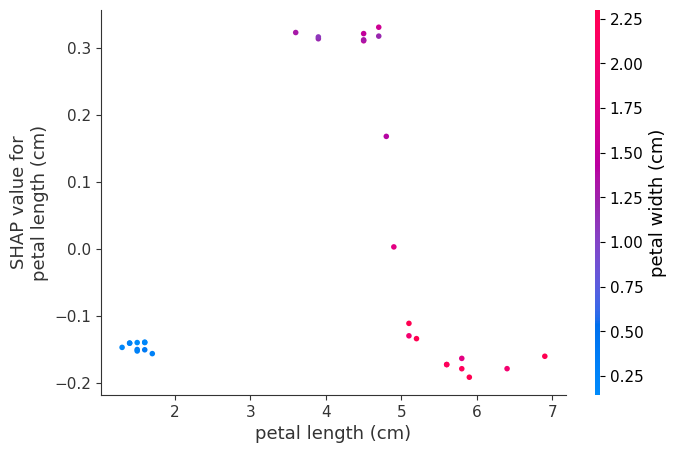

In [6]:
# Plot dependence plot for a specific feature
shap.dependence_plot("petal length (cm)",
                     shap_values[1],
                     X_test,
                     interaction_index="petal width (cm)")

## How to interpret it:

- The plot illustrates the relationship between `petal length (cm)` and its SHAP values.
- The x-axis corresponds to the actual values of `petal length (cm)` within the dataset.
- The y-axis indicates the SHAP values for the feature `petal length (cm)`, which quantify the impact of this feature on the model's prediction.
- The color scale on the right represents the `petal width (cm)`, suggesting that the SHAP values are also influenced by this second feature.

## Observations:

- There is a cluster of points with `petal length (cm)` below 2.5, which have negative SHAP values, indicating they reduce the predicted output.
- As the `petal length (cm)` increases, the SHAP values also tend to increase, showing a positive correlation with the model's prediction.
- The coloring of the points suggests that the `petal width (cm)` may interact with `petal length (cm)`, as different `petal width (cm)` values correspond to different SHAP values for similar `petal length (cm)` values.

## Conclusion:

- `Petal length (cm)` significantly influences the model's prediction, especially for larger values.
- There seems to be an interaction effect with `petal width (cm)` that further affects the SHAP value, as indicated by the varying colors across the plot's points.


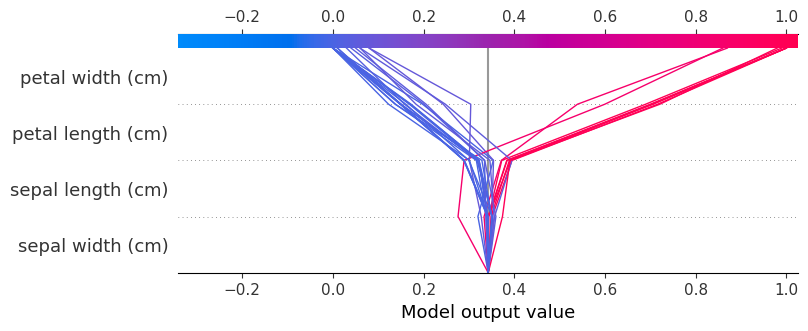

In [7]:
# Plotting a SHAP decision plot
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test)

## How to interpret it:

- This decision plot shows how each feature contributes to shifting the model's output from the base value (the model's average prediction over the dataset) to the final prediction for specific instances.
- The x-axis denotes the model output value, which can be interpreted as the probability of a particular class in a classification setting.
- Each line represents an individual prediction's path from the base value to the model output value, with the color indicating the feature's contribution.

## Feature Contributions:

### Petal Width (cm)
- Starts by contributing negatively (moving the prediction to the left) but then shifts to provide positive contributions (moving to the right).

### Petal Length (cm)
- Consistently provides positive contributions (moving the prediction to the right).

### Sepal Length (cm)
- Shows varying impact, with most contributions being positive.

### Sepal Width (cm)
- Generally has a minor negative contribution across different predictions.

## Observations:

- The plot suggests `petal width (cm)` and `petal length (cm)` are the most influential features.
- The separation between lines towards the right side implies that different instances have varied feature impacts leading to different predictions.
- The convergence of lines towards the right side indicates a strong positive contribution from features, especially `petal length (cm)`.